In [2]:
import numpy as np
#import tensorflow.nn
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
from filters import *

In [3]:
# !pip install tensorflow-addons
# from tensorflow_addons.image import median_filter2d

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rc('image', cmap='jet')

HW_path = '/Users/parsa/Daneshgah/Arshad/2/DIP/HomeWorks/HW1-1400-2/'
images_path = os.path.join(HW_path, 'images')
results_path = os.path.join(HW_path, 'results')

# 5

In [6]:
image1 = plt.imread(os.path.join(images_path, '3.jpg'))
print(np.all(image1[..., 0] == image1[..., 1]), np.all(image1[..., 2] == image1[..., 1]))
image1.shape

False False


(294, 300, 3)

In [ ]:
plt.imshow(image1)

In [8]:
image1_fft = np.zeros_like(image1, dtype=np.cdouble)

for i in range(3):
    image1_fft[..., i] = fft(image1[..., i], list(np.array(image1.shape[:-1])))

In [ ]:
im = plt.imshow(increase_contrast(image1_fft[..., 0]))
plt.colorbar(im, fraction=0.035, pad=0.04)

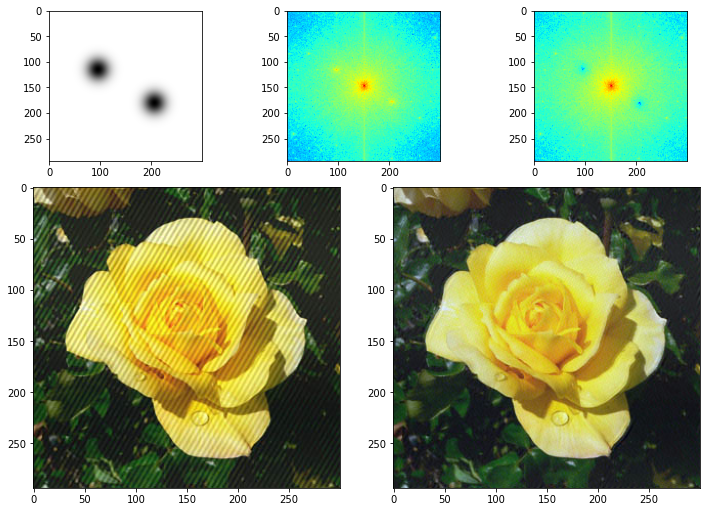

In [10]:


height, width, c = image1_fft.shape

my_filter = 1
for x, y in [(95, 115), [205,180]]:
    my_filter += noghte_filter_gaussian(height, width, x, y, 15)
#my_filter |= ILPF(height, width, 45)

new_spectrum = image1_fft[...] * my_filter[..., np.newaxis]

fig, axd = plt.subplot_mosaic([[0, 0, 1, 1, 3, 3],
                               [4,4,4,2, 2, 2],
                               [4,4,4,2, 2, 2]],
                              figsize=(10, 7), constrained_layout=True)



axd[0].imshow(my_filter, cmap='gray')

axd[1].imshow(increase_contrast(image1_fft[..., 0], 2))
axd[3].imshow(increase_contrast(new_spectrum[..., 0], 2))

image1_ifft = np.zeros_like(image1, dtype=float)
for i in range(3):
    pure_ifft = ifft(new_spectrum[..., i], list(np.array(image1.shape[:-1]))).astype(float)
    image1_ifft[..., i] = (pure_ifft - pure_ifft.min()) / (pure_ifft.max() - pure_ifft.min())

axd[2].imshow(image1_ifft)
axd[4].imshow(image1)
